# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [48]:
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

filename_features = "features.txt"
#filename_labels = "activity_labels.txt"
filename_subtrain = "subject_train.txt"
filename_xtrain = "X_train.txt"
filename_ytrain = "y_train.txt"
filename_subtest = "subject_test.txt"
filename_xtest = "X_test.txt"
filename_ytest = "y_test.txt"

# Carregar o arquivo de features sem o argumento 'squeeze'
features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")
features = pd.Series(features['nome_var'])  # Transformar em Series

#labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

# Carregar os demais arquivos de forma semelhante, sem 'squeeze'
subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])
X_test = pd.read_csv(filename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])


C:\Users\User\AppData\Local\Temp\ipykernel_13424\1765450544.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
C:\Users\User\AppData\Local\Temp\ipykernel_13424\1765450544.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(filename_xtest, delim_whitespace=True, header=None, names=features.tolist())


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [49]:
%%time

clf = DecisionTreeClassifier(ccp_alpha=0.001)

clf.fit(X_train, y_train)

print(f'Acurácia na base de treinamento: {clf.score(X_train, y_train)}')

print(f'Acurácia na base de teste: {clf.score(X_test, y_test)}\n')

Acurácia na base de treinamento: 0.9757889009793254
Acurácia na base de teste: 0.8812351543942993

CPU times: total: 6.02 s
Wall time: 6 s


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [52]:
%%time

pca = PCA(n_components=1)
pc_treino = pca.fit_transform(X_train)
pc_teste = pca.transform(X_test)

print(f'Dimensões da base de treinamento: {pc_treino.shape}')
print(f'Dimensões da base de teste: {pc_teste.shape}\n')

clf = DecisionTreeClassifier(ccp_alpha=0.001)
clf.fit(pc_treino, y_train)

print(f'Acurácia na base de treinamento: {clf.score(pc_treino, y_train)}')
print(f'Acurácia na base de teste: {clf.score(pc_teste, y_test)}\n')


Dimensões da base de treinamento: (7352, 1)
Dimensões da base de teste: (2947, 1)

Acurácia na base de treinamento: 0.499727965179543
Acurácia na base de teste: 0.45707499151679676

CPU times: total: 781 ms
Wall time: 231 ms


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


Dimensões da base de treinamento: (7352, 1)
Dimensões da base de teste: (2947, 1)
Acurácia na base de treinamento: 0.499727965179543
Acurácia na base de teste: 0.45707499151679676

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Dimensões da base de treinamento: (7352, 2)
Dimensões da base de teste: (2947, 2)
Acurácia na base de treinamento: 0.6127584330794341
Acurácia na base de teste: 0.5846623685103495

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Dimensões da base de treinamento: (7352, 5)
Dimensões da base de teste: (2947, 5)
Acurácia na base de treinamento: 0.8460282916213275
Acurácia na base de teste: 0.7889379029521547

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Dimensões da base de treinamento: (7352, 10)
Dimensões da base de teste: (2947, 10)
Acurácia na base de treinamento: 0.8926822633297062
Acurácia na base de teste: 0.8242280285035629

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Dimensões da base de treinamen

<Axes: ylabel='score_train'>

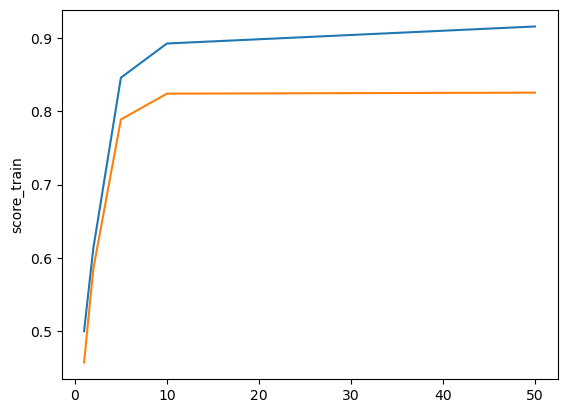

In [57]:
%%time

componentes = [1, 2, 5, 10, 50]

score_train = []
score_test = []

for n in componentes:
    # Executa o PCA com o número de componentes atual
    prcomp = PCA(n_components=n).fit(X_train)

    pc_treino = prcomp.transform(X_train)
    pc_teste  = prcomp.transform(X_test)

    print(f'Dimensões da base de treinamento: {pc_treino.shape}')
    print(f'Dimensões da base de teste: {pc_teste.shape}')

    clf = DecisionTreeClassifier(ccp_alpha=0.001)
    clf.fit(pc_treino, y_train)

    print(f'Acurácia na base de treinamento: {clf.score(pc_treino, y_train)}')
    print(f'Acurácia na base de teste: {clf.score(pc_teste, y_test)}\n')
    score_train.append(clf.score(pc_treino, y_train))
    score_test.append(clf.score(pc_teste, y_test))
    print("-="*30)

dict = {'score_train':score_train,
        'score_test':score_test}

df_chart = pd.DataFrame(dict)

sns.lineplot(data=df_chart,y='score_train',x=componentes)
sns.lineplot(data=df_chart,y='score_test',x=componentes)

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

Ao reduzir a dimensionalidade utilizando a técnica de Análise de Componentes Principais (PCA), observamos que a principal mudança e mais perceptível ocorre em relação ao tempo de processamento. A árvore de decisão executada com o conjunto de dados completo, contendo todas as 561 variáveis, levou aproximadamente 6 s segundos para ser executada, resultando em uma acurácia de 88% na base de teste. No entanto, ao utilizar o PCA com apenas um componente, o tempo de processamento foi reduzido para pouco menos de 231 ms, porém a acurácia na base de testes foi de 45%.

Aumentando o número de componentes, foi possível aumentar gradualmente a acurácia na base de testes. Com 50 componentes, foi atingida uma acurácia de até283%, com um tempo de processamento de aproximadamente.5 2 segundos para executar todas as 5 combinações de números diferentes de componentes. Portanto, podemos concluir que é possível obter uma acurácia semelhante à árvore com todas as variáveis do conjunto de dados, porém com um tempo de processamento reduzido em menos da metade. É importante ressaltar que os componentes são formados a partir da combinação linear das variáveis originais.